# Assignment 5

Natural Language Processing

UE15CS333

Nitish J Makam

01FB15ECS197

PES UNIVERSITY


In [20]:
import pandas as pd
import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import TruncatedSVD
from sklearn import svm
from sklearn import metrics
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
stopwords=set(stopwords.words('english'))

In [2]:
#Importing the review dataset
dataset=pd.read_csv("dataset.csv")

#Dropping from the dataset all unnecessary columns
dataset=dataset.drop('review_id',axis=1)
dataset=dataset.drop('business_id',axis=1)
dataset=dataset.drop('date',axis=1)
dataset=dataset.drop('user_id',axis=1)
dataset=dataset.drop('type',axis=1)
dataset=dataset.drop('cool',axis=1)
dataset=dataset.drop('useful',axis=1)
dataset=dataset.drop('funny',axis=1)

In [3]:
#Preprocessing the Stars column of the dataset
for i in range(dataset.shape[0]):
        if(int(dataset.iat[i,0])<=3):
            dataset.iat[i,0]=0
        else:
            dataset.iat[i,0]=1
#Function to tokenize text and include only the meaningful tokens
def convertIntoTokens(text):
    words2=nltk.pos_tag(nltk.word_tokenize(text))
    words=[]
    for word,tag in words2:
        if(word.isalpha() and not word in stopwords and (tag.startswith('NN') or tag.startswith('JJ') or tag.startswith('VB'))):
            words.append(word)
    return words

In [4]:
#Tokenizing each review
for i in range(dataset.shape[0]):
    text=dataset.loc[i,'text']
    dataset.at[i,'text']=convertIntoTokens(text)
#print(dataset)

In [5]:
corpus=[]
for i in range(dataset.shape[0]):
    corpus.append(" ".join(list(dataset.loc[i,'text'])))

In [23]:
#PART 1
#TF-IDF 
vectorizer = TfidfVectorizer(min_df=2)
X=vectorizer.fit_transform(corpus)
y=dataset['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model1=svm.SVC(kernel='linear',C=1)
model1.fit(X_test,y_test)
scores=cross_val_score(model1,X_train,y_train,cv=10)
y_predicted=model1.predict(X_test)

#### CASE 1



Mean accuracy is 0.819599224888

Standard deviation of accuracy is 0.0091175177841

Confusion Matrix
 [[ 687   89]
 [   9 1715]]

 Classification Report
             precision    recall  f1-score   support

          0       0.99      0.89      0.93       776
          1       0.95      0.99      0.97      1724

avg / total       0.96      0.96      0.96      2500



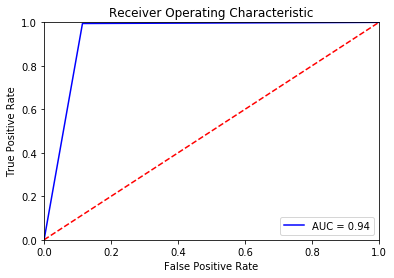

In [19]:
#print(metrics.accuracy_score(y_predicted,y_test))
#print(metrics.classification_report(y_predicted,y_test,labels=[0,1]))
print("\nMean accuracy is",np.mean(scores))
print("\nStandard deviation of accuracy is",np.std(scores))
cm1=confusion_matrix(y_test,y_predicted)
print("\nConfusion Matrix\n",cm1)
print("\n Classification Report")
print(classification_report(y_test,y_predicted))
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc=roc_auc_score(y_test, y_predicted)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### CASE 2

In [ ]:
svd = TruncatedSVD(n_components=2000, n_iter=7, random_state=42)
X= svd.fit_transform(X)
print(svd.explained_variance_ratio_.sum()) 